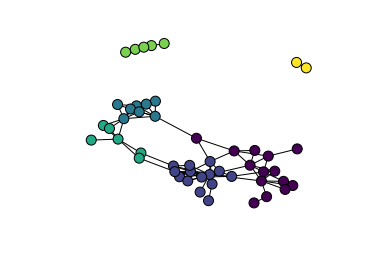

In [12]:
import numpy as np
import community
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import random

random.seed(0)

% matplotlib inline

df=pd.read_csv('author_list.txt',names=['lastname','firstname'])

df['community']=0
adj = np.load('network.npy')



G = nx.from_numpy_matrix(adj)


labels={}

for ind,author in df.iterrows():
    if np.sum(adj[:,ind]):
        labels[ind]=author.lastname

G.remove_nodes_from(nx.isolates(G))
pos=nx.spring_layout(G,k=0.05,iterations=2000) # positions for all nodes


parts = community.best_partition(G)
values = [parts.get(node) for node in G.nodes()]



#values = [val_map.get(node, 0.25) for node in G.nodes()]

#nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
nx.draw_networkx_nodes(G,pos, cmap=plt.get_cmap('viridis'), node_color=values,node_size=100,node_shape)
nx.draw_networkx_edges(G,pos)
#nx.draw_networkx_labels(G,pos,labels,font_size=8)
plt.axis('off')
plt.show()


